In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_test_categorical = keras.utils.to_categorical(y_train)

In [ ]:
def plot_image(img):
  plt.figure(figsize=(10,1))
  plt.imshow(img)


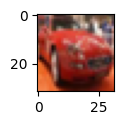

In [ ]:
plot_image(x_train[5])

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
x_train[0].shape[0]*x_train[0].shape[1]*x_train[0].shape[2]

3072

In [ ]:
input_shape = x_train[0].shape
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(3000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(len(classes), activation="sigmoid"))

In [ ]:
model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
def get_model():
  input_shape = x_train[0].shape
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  model.add(Dense(3000, activation="relu"))
  model.add(Dense(1000, activation="relu"))
  model.add(Dense(len(classes), activation="sigmoid"))

  model.compile(
      optimizer="SGD",
      loss="categorical_crossentropy",
      metrics=["accuracy"]
  )
  return model


In [ ]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 126s 80ms/step - loss: 1.8104 - accuracy: 0.3565
2min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device("/GPU:0"):
  gpu_model = get_model()
  gpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8106 - accuracy: 0.3530
11.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
